<a href="https://colab.research.google.com/github/saketlakhotia17/IBM_MachineLearning/blob/main/4.%20Multiple%20Regression/Exp5_ML_I027(IBM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 5 - Multiple Regression

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('MLR_data.csv')
df

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256
5,2017,7,2.50,5.6,1254
6,2017,6,2.50,5.5,1234
7,2017,5,2.25,5.5,1195
8,2017,4,2.25,5.5,1159
9,2017,3,2.25,5.6,1167


Text(0.5, 1.0, 'Association between Interest rate and Stock Index Price')

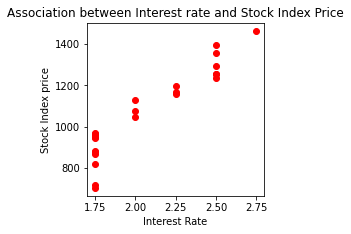

In [ ]:
#Generate multiple regression
#Condition : 
# 1. Depenedent variable(Stock_Index_Price) should be dependent on Interest Rate and Unemployment Rate.

x1 = df['Interest_Rate']
x2 = df['Unemployment_Rate']
y = df['Stock_Index_Price']

plt.figure(figsize = (7,7))
plt.subplot(2,2,1)
plt.scatter(x1,y,color='red')
plt.xlabel('Interest Rate')
plt.ylabel('Stock Index price')
plt.title('Association between Interest rate and Stock Index Price')

Text(0.5, 1.0, 'Association between Unemployment and Stock Index Price')

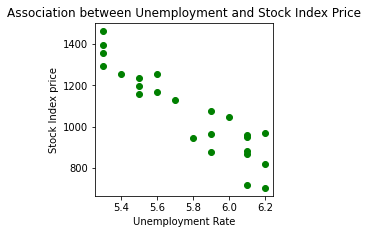

In [ ]:
plt.figure(figsize = (7,7))
plt.subplot(2,2,2)
plt.scatter(x2,y,color='green')
plt.xlabel('Unemployment Rate')
plt.ylabel('Stock Index price')
plt.title('Association between Unemployment and Stock Index Price')

Text(0.5, 1.0, 'Association between Interest Rate and Unemployment Rate')

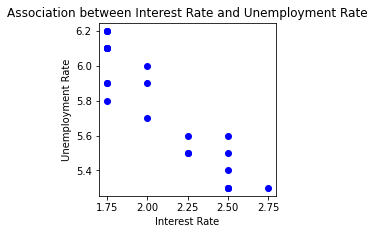

In [ ]:
#Condition : 
# 2. Independent variables (Interest_rate and unemployment_rate) should not be dependent on each other.

plt.figure(figsize = (7,7))
plt.subplot(2,2,3)
plt.scatter(x1,x2,color='blue')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')
plt.title('Association between Interest Rate and Unemployment Rate')


In [ ]:
# Generate Multiple Regression Model Using both Independent Variables
# Y = b0 + b1X1 + b2X3
X = df[['Interest_Rate','Unemployment_Rate']]
Y= df['Stock_Index_Price']
regr = linear_model.LinearRegression()
regr.fit(X,Y)
b0 = regr.intercept_
b1 = regr.coef_[0]
b2 = regr.coef_[1]

print('Intercept : ', b0)
print('Coefficiant : ', regr.coef_)


Intercept :  1798.4039776258546
Coefficiant :  [ 345.54008701 -250.14657137]


In [ ]:
new_Interest_Rate = 2.75
new_Unemployment_Rate = 5.3
new_Stock_Index_Price = (b0 + (b1*new_Interest_Rate) + (b2*new_Unemployment_Rate))
print('New Stock Index Price : ', new_Stock_Index_Price)

New Stock Index Price :  1422.8623886471935


In [ ]:
regr.predict([[new_Interest_Rate,new_Unemployment_Rate]])

array([1422.86238865])

In [ ]:
# Determine statistical parameters of the model
X

,Interest_Rate,Unemployment_Rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [ ]:
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
result = model.predict(X)
model_result = model.summary()
print(model_result)


                            OLS Regression Results                            
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Mon, 24 Aug 2020   Prob (F-statistic):           4.04e-11
Time:                        11:48:10   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1798.4040    899.24

In [ ]:
# Use only 1 independent variable since p-value of indivisual values is high and result in ambiguous
x1 = np.array(x1)
x1 = x1.reshape((-1,1))
regr1 = linear_model.LinearRegression()
regr.fit(x1,Y)
b0= regr.intercept_
b = regr.coef_
print('Intercept ',b0)
print('Coefficient ',b)

Intercept  -99.46431881371655
Coefficient  [564.20389249]


In [ ]:
model1 = sm.OLS(Y,x1).fit()
model1_result = model1.summary()

print(model1_result)

                                 OLS Regression Results                                
Dep. Variable:      Stock_Index_Price   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              4897.
Date:                Mon, 24 Aug 2020   Prob (F-statistic):                    2.63e-28
Time:                        12:04:19   Log-Likelihood:                         -137.52
No. Observations:                  24   AIC:                                      277.0
Df Residuals:                      23   BIC:                                      278.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Conclusion :

1. Given dataset has 2 independent variables and 1 dependent variable.

2. Both independent variables are assciated with dependent variables.

3. For second condition, Independent variable should not be dependent on each other.For given data set interest rate and unemployment rate are related to each other. Because of this dependence overall model shows high R^2 value and high p-values for each independent variable. This shows ambiguous result.

4. To avoid this above situation, one of the variables is dropped. Model using one variable shows high R^2 and f-statistics values. It also shows p-value for independent variable. Therefore, it can be concluded that before generating regression model both the conditions should be satisfied.
